word2vec


In [ ]:
!pip install gensim #gensim python library for nlp tasks
#word2vec is a model in gensim used to create word embedings


In [ ]:
from gensim.models import Word2Vec


corpus = [
    ["hello", "world"],
    ["machine", "learning", "is", "fun"],
    ["deep", "learning", "uses", "neural", "networks"],

]#corpus=list of sentences

# Training Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=4, window=2, min_count=1, sg=1)#vector_size represents size of word embedding -how many no of feaatures represent each word
#window -how many words before/after should be considered as context
#min_count-ignores words that appear less than 1 time ensures all words are included
#sg-uses skipgram model(if sg=0, it would use CBOW).sg=1 works well with small datasets

# Get word embeddings
print(model.wv["learning"])  # Example vector for "learning"
#model.wv is the word vector dictionary (contains all learned word embeddings).


[-0.01340568  0.00591078  0.12758374  0.22523183]


In [3]:
from gensim.models import Word2Vec


corpus = [
    ["hello", "world"],
    ["machine", "learning", "is", "fun"],
    ["deep", "learning", "uses", "neural", "networks"],

]#corpus=list of sentences

# Training Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=16, window=3, min_count=1, sg=1)#vector_size represents size of word embedding
#window -how many words before/after should be considered as context
#min_count-ignores words that appear less than 1 time ensures all words are included
#sg-uses skipgram model(if sg=0, it would use CBOW).sg=1 works well with small datasets

# Get word embeddings
print(model.wv["learning"])  # Example vector for "learning"
#model.wv is the word vector dictionary (contains all learned word embeddings).


[-0.00335142  0.0014777   0.03189594  0.05630796 -0.05814344 -0.04448006
  0.04036795  0.05608118 -0.03134643 -0.02352107  0.04612815 -0.0095842
 -0.02835383  0.04096282 -0.030376   -0.01135011]


In [ ]:
from gensim.models import Word2Vec


corpus = [
    ["hello", "world"],
    ["machine", "learning", "is", "fun"],
    ["deep", "learning", "uses", "neural", "networks"],

]#corpus=list of sentences

# Training Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=4, window=2, min_count=2, sg=1)#vector_size represents size of word embedding
#window -how many words before/after should be considered as context
#min_count-ignores words that appear less than 1 time ensures all words are included
#sg-uses skipgram model(if sg=0, it would use CBOW).sg=1 works well with small datasets

# Get word embeddings
print(model.wv["learning"])  # Example vector for "learning"
#model.wv is the word vector dictionary (contains all learned word embeddings).


[-0.01340568  0.00591078  0.12758374  0.22523183]


In [ ]:
corpus_extended = [
    ["hello", "world"],
    ["machine", "learning", "is", "fun"],
    ["deep", "learning", "uses", "neural", "networks"],
    ["natural", "language", "processing"],
    ["artificial", "intelligence", "is", "powerful"],
    ["data", "science", "involves", "statistics"],
    ["python", "is", "popular", "for", "machine", "learning"]
]

# Train new model with more vocabulary
model_extended = Word2Vec(sentences=corpus_extended, vector_size=20, window=3, min_count=1, sg=1)

# Get new word vector
print(model_extended.wv["intelligence"])  # Example vector


[-0.04121339  0.04649677 -0.0009883  -0.00983638  0.02301815 -0.02047658
  0.01371557  0.03469983  0.03032713 -0.03755397  0.04691175  0.02335904
  0.0198306  -0.03121753  0.0422999  -0.01075082  0.04412594 -0.02681001
 -0.0406471   0.03412279]


In [ ]:
print(model_extended.wv.most_similar("learning"))


[('science', 0.4658801257610321), ('world', 0.39643120765686035), ('powerful', 0.3512759804725647), ('processing', 0.33658120036125183), ('involves', 0.3148750960826874), ('python', 0.26402661204338074), ('popular', 0.22736574709415436), ('language', 0.14545801281929016), ('hello', 0.06370002031326294), ('for', 0.055957745760679245)]


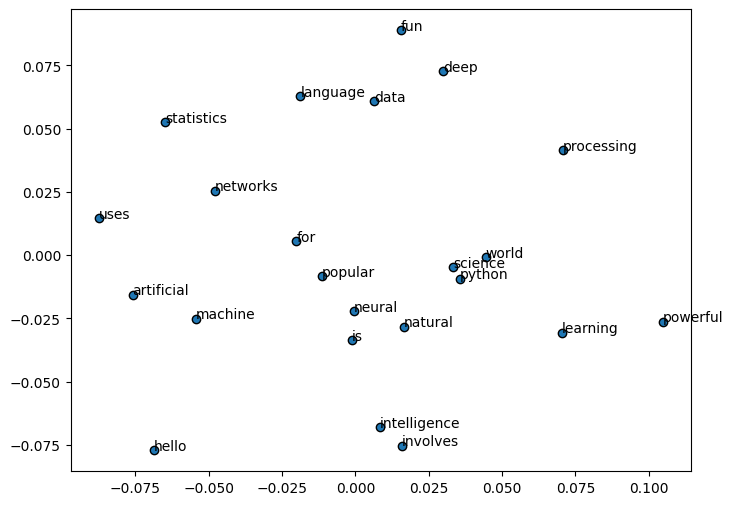

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions of word vectors
words = list(model_extended.wv.index_to_key)
X = model_extended.wv[words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot words in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolors='k')

for i, word in enumerate(words):
    plt.text(X_pca[i, 0], X_pca[i, 1], word)

plt.show()


GLOVE

In [ ]:
!pip install gensim numpy



In [4]:
import gensim.downloader as api

# Load the pre-trained GloVe model (50D version)
glove_model = api.load("glove-wiki-gigaword-50")

# Get the list of all words in the model's vocabulary
vocab_words = list(glove_model.key_to_index.keys())

# Print the first 20 words as a sample
print(vocab_words[:20])


[==================================================] 100.0% 66.0/66.0MB downloaded
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as']


In [6]:
word = "quantum"
if word in glove_model.key_to_index:
    print(f"'{word}' exists in the GloVe vocabulary!")
else:
    print(f"'{word}' is NOT in the GloVe vocabulary.")


'quantum' exists in the GloVe vocabulary!


In [9]:
import gensim.downloader as api

# Load a pre-trained GloVe model (50D, 100D, or 300D available)
glove_model = api.load("glove-wiki-gigaword-50")  # 50-dimensional vectors

# Example: Get the vector for a word
vector = glove_model["example"]
print("Vector for 'example':", len(vector))

# Find most similar words
similar_words = glove_model.most_similar("example", topn=5)#The topn parameter is used in functions like .most_similar() to limit the number of similar words returned.
print("Most similar words to 'example':", similar_words)


Vector for 'example': 50
Most similar words to 'example': [('instance', 0.9669908881187439), ('particular', 0.9291923642158508), ('such', 0.9044108390808105), ('similar', 0.9010181427001953), ('same', 0.9001578092575073)]


In [5]:
import gensim.downloader as api

# Load a pre-trained GloVe model (50D, 100D, or 300D available)
glove_model = api.load("glove-wiki-gigaword-50")  # 50-dimensional vectors

# Example: Get the vector for a word
vector = glove_model["example"]
print("Vector for 'example':", vector)

# Find most similar words
similar_words = glove_model.most_similar("example", topn=14)#The topn parameter is used in functions like .most_similar() to limit the number of similar words returned.
print("Most similar words to 'example':", similar_words)

Vector for 'example': [ 0.51564    0.56912   -0.19759    0.0080456  0.41697    0.59502
 -0.053312  -0.83222   -0.21715    0.31045    0.09352    0.35323
  0.28151   -0.35308    0.23496    0.04429    0.017109   0.0063749
 -0.01662   -0.69576    0.019819  -0.52746   -0.14011    0.21962
  0.13692   -1.2683    -0.89416   -0.1831     0.23343   -0.058254
  3.2481    -0.48794   -0.01207   -0.81645    0.21182   -0.17837
 -0.02874    0.099358  -0.14944    0.2601     0.18919    0.15022
  0.18278    0.50052   -0.025532   0.24671    0.10596    0.13612
  0.0090427  0.39962  ]
Most similar words to 'example': [('instance', 0.9669908881187439), ('particular', 0.9291923642158508), ('such', 0.9044108390808105), ('similar', 0.9010181427001953), ('same', 0.9001578092575073), ('this', 0.8920628428459167), ('certain', 0.8821814656257629), ('different', 0.8707563281059265), ('common', 0.870438814163208), ('as', 0.8677935600280762), ('unlike', 0.8673081994056702), ('well', 0.8658074736595154), ('is', 0.865465

In [8]:
import gensim.downloader as api

# Load a pre-trained GloVe model (50D, 100D, or 300D available)
glove_model = api.load("glove-wiki-gigaword-50")  # 50-dimensional vectors

# Example: Get the vector for a word
vector = glove_model["learning"]
print("Vector for 'learning':", vector)

# Find most similar words
similar_words = glove_model.most_similar("example", topn=5)#The topn parameter is used in functions like .most_similar() to limit the number of similar words returned.
print("Most similar words to 'example':", similar_words)

Vector for 'learning': [ 0.20461   0.48659  -0.55308  -0.27019   0.26336   0.15751  -0.28994
 -0.51824   0.051829  0.36225   0.37077   0.1322   -0.061377 -0.53606
 -0.34733  -0.043981 -0.086744  0.78305   0.41422   0.027996  0.23433
  0.98844  -0.41049   0.6206    1.3966   -0.65427  -0.18221  -1.0293
 -0.014741 -0.25384   3.227     0.39509  -0.33042  -1.229     0.29048
  0.33654  -0.24817   0.47105   0.32964   0.23997   0.088302 -0.91779
 -0.36671   0.9926    0.2185   -0.316     1.203     0.2699   -0.14093
  0.70785 ]
Most similar words to 'example': [('instance', 0.9669908881187439), ('particular', 0.9291923642158508), ('such', 0.9044108390808105), ('similar', 0.9010181427001953), ('same', 0.9001578092575073)]


FOOD REVIEW CLASSIFICATIION

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Embedding

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [ ]:
one_hot("amazing restaurant",30)#30-vocalburary size

[19, 17]

In [ ]:
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[29, 7], [19, 17], [19, 21], [11, 20, 15], [17, 24, 8], [13, 7], [25, 24, 13], [3, 23], [3, 22], [6, 29]]


In [ ]:

max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[29  7  0  0]
 [19 17  0  0]
 [19 21  0  0]
 [11 20 15  0]
 [17 24  8  0]
 [13  7  0  0]
 [25 24 13  0]
 [ 3 23  0  0]
 [ 3 22  0  0]
 [ 6 29  0  0]]


In [ ]:
embeded_vector_size = 4

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))#1 layer
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
X = padded_reviews
y = sentiment

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 4, 4)                │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.fit(X, y, epochs=50, verbose=0)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 1.0000 - loss: 0.6389


1.0

In [ ]:

weights = model.get_layer('embedding').get_weights()[0]

In [ ]:

weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [ ]:
weights[13]

array([ 0.10218206, -0.06920243, -0.08348232, -0.10755384], dtype=float32)

project-2


In [ ]:
 !pip install gensim
 !pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.3 MB/s eta 0:00:00


In [ ]:
import gensim
import pandas as pd

df = pd.read_json("/content/Cell_Phones_and_Accessories_5.json", lines=True)
df

df.shape

review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

review_text.loc[0]

df.reviewText.loc[0]
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)
model.build_vocab(review_text, progress_per=1000)
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

model.save("./word2vec-amazon-cell-accessories-reviews-short.model")
model.wv.most_similar("bad")
model.wv.similarity(w1="cheap", w2="inexpensive")

model.wv.similarity(w1="great", w2="good")


0.7828121

Epoch 1/10


Epoch 2/10


Epoch 3/10


Epoch 4/10


Epoch 5/10


Epoch 6/10


Epoch 7/10


Epoch 8/10


Epoch 9/10


Epoch 10/10


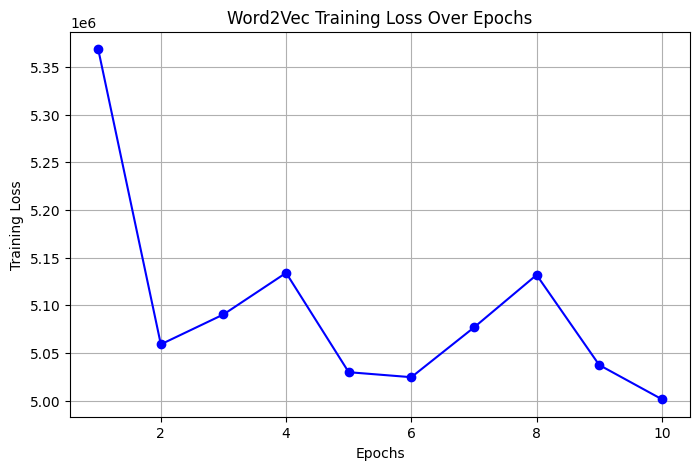

Similarity(cheap, inexpensive): 0.4967
Similarity(great, good): 0.7713
Similarity(bad, awful): 0.4764


In [ ]:
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_json("/content/Cell_Phones_and_Accessories_5.json", lines=True)

# Preprocess Text
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

# Train-Test Split (80-20)
train_text, test_text = train_test_split(review_text, test_size=0.2, random_state=42)

# Initialize Word2Vec Model
model = gensim.models.Word2Vec(
    vector_size=100,  # Embedding dimensions
    window=10,        # Context window
    min_count=2,      # Ignore rare words
    workers=4,        # Parallel processing
)

# Build Vocabulary
model.build_vocab(train_text, progress_per=1000)

# Track Loss Over Epochs
losses = []
epochs = 10  # You can increase this

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    model.train(train_text, total_examples=model.corpus_count, epochs=1, compute_loss=True)
    loss = model.get_latest_training_loss()
    losses.append(loss)

# Save Model
model.save("./word2vec-amazon-cell-accessories-reviews.model")

# Plot Loss Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', color='b')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Word2Vec Training Loss Over Epochs")
plt.grid()
plt.show()

# Word Similarity Check
word_pairs = [("cheap", "inexpensive"), ("great", "good"), ("bad", "awful")]

for w1, w2 in word_pairs:
    try:
        sim = model.wv.similarity(w1, w2)
        print(f"Similarity({w1}, {w2}): {sim:.4f}")
    except KeyError:
        print(f"Words '{w1}' or '{w2}' not in vocabulary.")


Epoch 1/100


Epoch 2/100


Epoch 3/100


Epoch 4/100


Epoch 5/100


Epoch 6/100


Epoch 7/100


Epoch 8/100


Epoch 9/100


Epoch 10/100


Epoch 11/100


Epoch 12/100


Epoch 13/100


Epoch 14/100


Epoch 15/100


Epoch 16/100


Epoch 17/100


Epoch 18/100


Epoch 19/100


Epoch 20/100


Epoch 21/100


Epoch 22/100


Epoch 23/100


Epoch 24/100


Epoch 25/100


Epoch 26/100


Epoch 27/100


Epoch 28/100


Epoch 29/100


Epoch 30/100


Epoch 31/100


Epoch 32/100


Epoch 33/100


Epoch 34/100


Epoch 35/100


Epoch 36/100


Epoch 37/100


Epoch 38/100


Epoch 39/100


Epoch 40/100


Epoch 41/100


Epoch 42/100


Epoch 43/100


Epoch 44/100


Epoch 45/100


Epoch 46/100


Epoch 47/100


Epoch 48/100


Epoch 49/100


Epoch 50/100


Epoch 51/100


Epoch 52/100


Epoch 53/100


Epoch 54/100


Epoch 55/100


Epoch 56/100


Epoch 57/100


Epoch 58/100


Epoch 59/100


Epoch 60/100


Epoch 61/100


Epoch 62/100


Epoch 63/100


Epoch 64/100


Epoch 65/100


Epoch 66/100


Epoch 67/100


Epoch 68/100


Epoch 69/100


Epoch 70/100


Epoch 71/100


Epoch 72/100


Epoch 73/100


Epoch 74/100


Epoch 75/100


Epoch 76/100


Epoch 77/100


Epoch 78/100


Epoch 79/100


Epoch 80/100


Epoch 81/100


Epoch 82/100


Epoch 83/100


Epoch 84/100


Epoch 85/100


Epoch 86/100


Epoch 87/100


Epoch 88/100


Epoch 89/100


Epoch 90/100


Epoch 91/100


Epoch 92/100


Epoch 93/100


Epoch 94/100


Epoch 95/100


Epoch 96/100


Epoch 97/100


Epoch 98/100


Epoch 99/100


Epoch 100/100


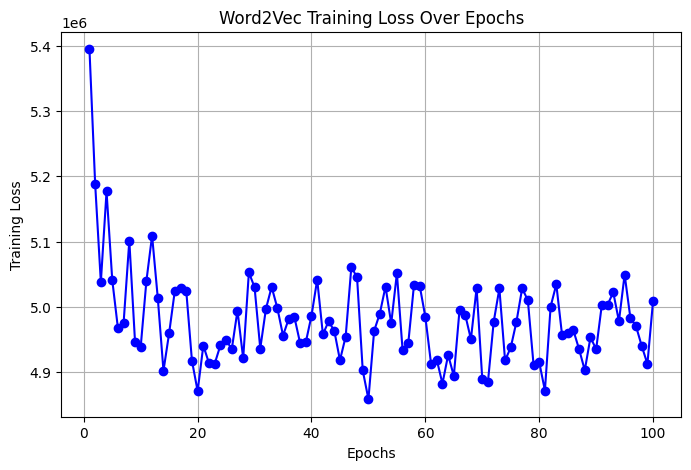

Similarity(cheap, inexpensive): 0.5177
Similarity(great, good): 0.7732
Similarity(bad, awful): 0.5059


In [ ]:
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_json("/content/Cell_Phones_and_Accessories_5.json", lines=True)

# Preprocess Text
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

# Train-Test Split (80-20)
train_text, test_text = train_test_split(review_text, test_size=0.2, random_state=42)

# Initialize Word2Vec Model
model = gensim.models.Word2Vec(
    vector_size=100,  # Embedding dimensions
    window=10,        # Context window
    min_count=2,      # Ignore rare words
    workers=4,        # Parallel processing
)

# Build Vocabulary
model.build_vocab(train_text, progress_per=1000)

# Track Loss Over Epochs
losses = []
epochs = 100 # You can increase this

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    model.train(train_text, total_examples=model.corpus_count, epochs=1, compute_loss=True)
    loss = model.get_latest_training_loss()
    losses.append(loss)

# Save Model
model.save("./word2vec-amazon-cell-accessories-reviews.model")

# Plot Loss Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', color='b')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Word2Vec Training Loss Over Epochs")
plt.grid()
plt.show()

# Word Similarity Check
word_pairs = [("cheap", "inexpensive"), ("great", "good"), ("bad", "awful")]

for w1, w2 in word_pairs:
    try:
        sim = model.wv.similarity(w1, w2)
        print(f"Similarity({w1}, {w2}): {sim:.4f}")
    except KeyError:
        print(f"Words '{w1}' or '{w2}' not in vocabulary.")

glove


In [ ]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_json("/content/Cell_Phones_and_Accessories_5.json", lines=True)

# Preprocess Text
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

# Train-Test Split (80-20)
train_text, test_text = train_test_split(review_text, test_size=0.2, random_state=42)

# Load Pretrained GloVe Vectors (Download from official site if needed)
glove_path = "/content/glove.6B.100d.txt"  # Change this path if needed

# Load GloVe Embeddings into a Dictionary
glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} word vectors from GloVe.")

# Function to Get Word Vector from GloVe
def get_glove_vector(word):
    return glove_embeddings.get(word, np.zeros(100))  # Default to zero vector if word is missing

# Test Similarity with GloVe
word_pairs = [("cheap", "inexpensive"), ("great", "good"), ("bad", "awful")]

for w1, w2 in word_pairs:
    try:
        vec1, vec2 = get_glove_vector(w1), get_glove_vector(w2)
        similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        print(f"Similarity({w1}, {w2}): {similarity:.4f}")
    except Exception as e:
        print(f"Error comparing words {w1}, {w2}: {e}")



Loaded 400000 word vectors from GloVe.
Similarity(cheap, inexpensive): 0.8237
Similarity(great, good): 0.7593
Similarity(bad, awful): 0.7059



Word Similarities (Cosine Similarity):
cheap - inexpensive: Word2Vec = 0.5214, GloVe = 0.8237
great - good: Word2Vec = 0.7825, GloVe = 0.7593
bad - awful: Word2Vec = 0.5129, GloVe = 0.7059

Nearest Neighbors for 'cheap':

Word2Vec:
[('cheep', 0.7677688002586365), ('flimsy', 0.7389633059501648), ('cheesy', 0.6650730967521667), ('legit', 0.6507651805877686), ('crappy', 0.6146986484527588)]

GloVe:
['cheaper', 'expensive', 'inexpensive', 'affordable', 'prices']


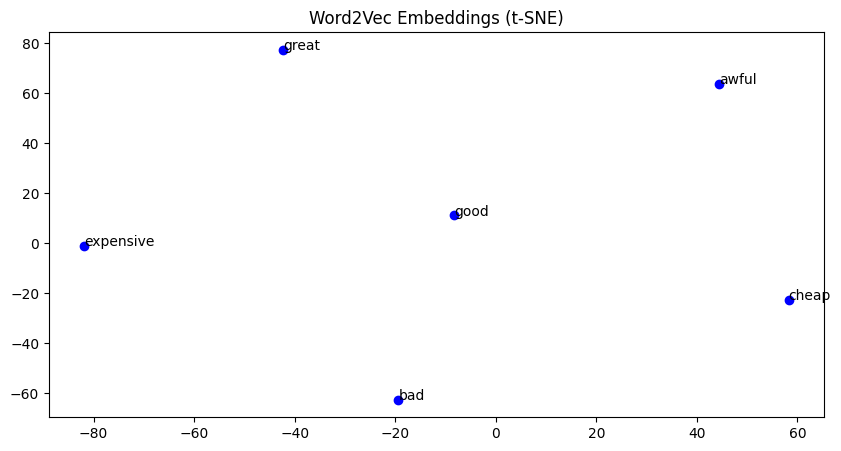

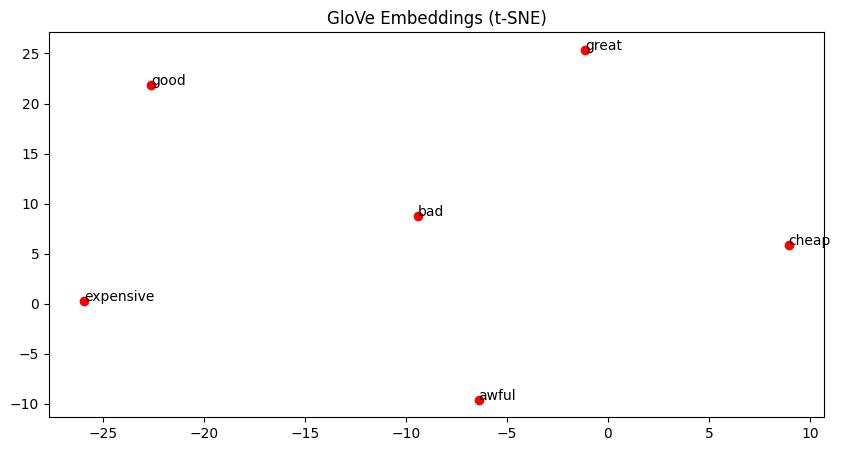

In [ ]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

# Load Dataset
df = pd.read_json("/content/Cell_Phones_and_Accessories_5.json", lines=True)

# Preprocess Text
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

# Train-Test Split (80-20)
train_text, test_text = train_test_split(review_text, test_size=0.2, random_state=42)

### --- WORD2VEC TRAINING --- ###
w2v_model = gensim.models.Word2Vec(
    vector_size=100, window=10, min_count=2, workers=4
)
w2v_model.build_vocab(train_text, progress_per=1000)
w2v_model.train(train_text, total_examples=w2v_model.corpus_count, epochs=10)

# Save Word2Vec Model
w2v_model.save("./word2vec-amazon-cell-accessories-reviews.model")

### --- LOAD GLOVE EMBEDDINGS --- ###
glove_path = "/content/glove.6B.100d.txt"  # Change path if needed

glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Function to Get GloVe Vector
def get_glove_vector(word):
    return glove_embeddings.get(word, np.zeros(100))  # Default zero vector if word not found

### --- WORD SIMILARITY COMPARISON --- ###
word_pairs = [("cheap", "inexpensive"), ("great", "good"), ("bad", "awful")]

print("\nWord Similarities (Cosine Similarity):")
for w1, w2 in word_pairs:
    try:
        # Word2Vec Similarity
        w2v_sim = w2v_model.wv.similarity(w1, w2) if w1 in w2v_model.wv and w2 in w2v_model.wv else None

        # GloVe Similarity
        vec1, vec2 = get_glove_vector(w1), get_glove_vector(w2)
        glove_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)) if np.linalg.norm(vec1) > 0 and np.linalg.norm(vec2) > 0 else None

        print(f"{w1} - {w2}: Word2Vec = {w2v_sim:.4f}, GloVe = {glove_sim:.4f}")

    except Exception as e:
        print(f"Error comparing {w1}, {w2}: {e}")

### --- NEAREST NEIGHBORS COMPARISON --- ###
test_word = "cheap"

print(f"\nNearest Neighbors for '{test_word}':")

if test_word in w2v_model.wv:
    print("\nWord2Vec:")
    print(w2v_model.wv.most_similar(test_word, topn=5))
else:
    print("Word2Vec: Word not found.")

if test_word in glove_embeddings:
    print("\nGloVe:")
    glove_similar = sorted(glove_embeddings.keys(), key=lambda w: np.dot(get_glove_vector(test_word), get_glove_vector(w)), reverse=True)[1:6]
    print(glove_similar)
else:
    print("GloVe: Word not found.")

### --- VISUALIZATION USING t-SNE --- ###
def visualize_embeddings(word_list, model, method_name):
    word_vectors = np.array([model.wv[word] for word in word_list if word in model.wv])
    labels = [word for word in word_list if word in model.wv]

    if len(word_vectors) < 2:
        print(f"Not enough words to visualize for {method_name}.")
        return

    # Set perplexity dynamically
    perplexity_value = min(30, len(word_vectors) - 1)

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color="blue")

    for i, label in enumerate(labels):
        plt.annotate(label, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title(f"{method_name} Embeddings (t-SNE)")
    plt.show()

# Choose sample words
words_to_visualize = ["cheap", "expensive", "good", "bad", "great", "awful"]

# Word2Vec Visualization
visualize_embeddings(words_to_visualize, w2v_model, "Word2Vec")

# GloVe Visualization
glove_vectors = np.array([get_glove_vector(word) for word in words_to_visualize if word in glove_embeddings])
labels = [word for word in words_to_visualize if word in glove_embeddings]

if len(glove_vectors) > 1:  # Ensure there are enough words
    perplexity_value = min(30, len(glove_vectors) - 1)  # Adjust perplexity dynamically

    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    reduced_vectors = tsne.fit_transform(glove_vectors)

    plt.figure(figsize=(10, 5))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color="red")

    for i, label in enumerate(labels):  # Use 'labels' instead of 'glove_words'
        plt.annotate(label, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title("GloVe Embeddings (t-SNE)")
    plt.show()
else:
    print("Not enough words to visualize for GloVe.")
